### Name: Pranay Rokade
### Machine Learning Mini Project

### Aim: 
### Choose a dataset of your preference.    
### Perform the EDA      
### Apply a variety of classification algorithms, including Logistic Regression (LR), Naive Bayes (NB), K-Nearest Neighbors (KNN), Decision Tree (DT), Random Forest (RF), and K-means.
### Assess their performance using classification metrics.
### Compare the performance of the entire classification algorithm.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Heart Attack Data Set.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.shape

(303, 14)

In [7]:
missing_values = df.isnull().sum()
missing_values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
print("Duplicates:\n", df.duplicated().sum())

Duplicates:
 1


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
print("Duplicates:\n", df.duplicated().sum())

Duplicates:
 0


In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


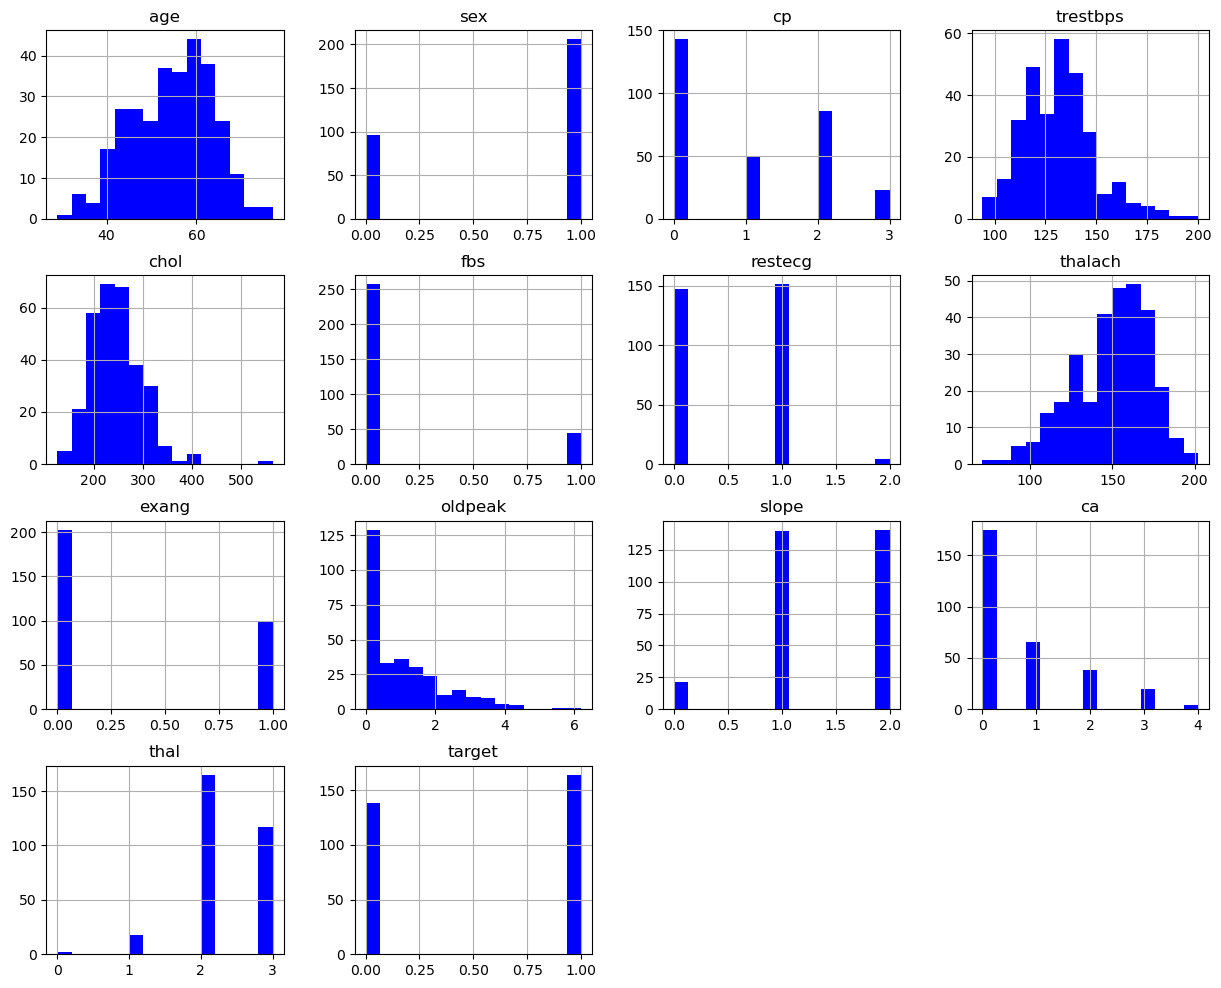

In [13]:
df.hist(figsize=(15,12),bins = 15, color = "blue")
plt.title("Features Distribution")
plt.show()

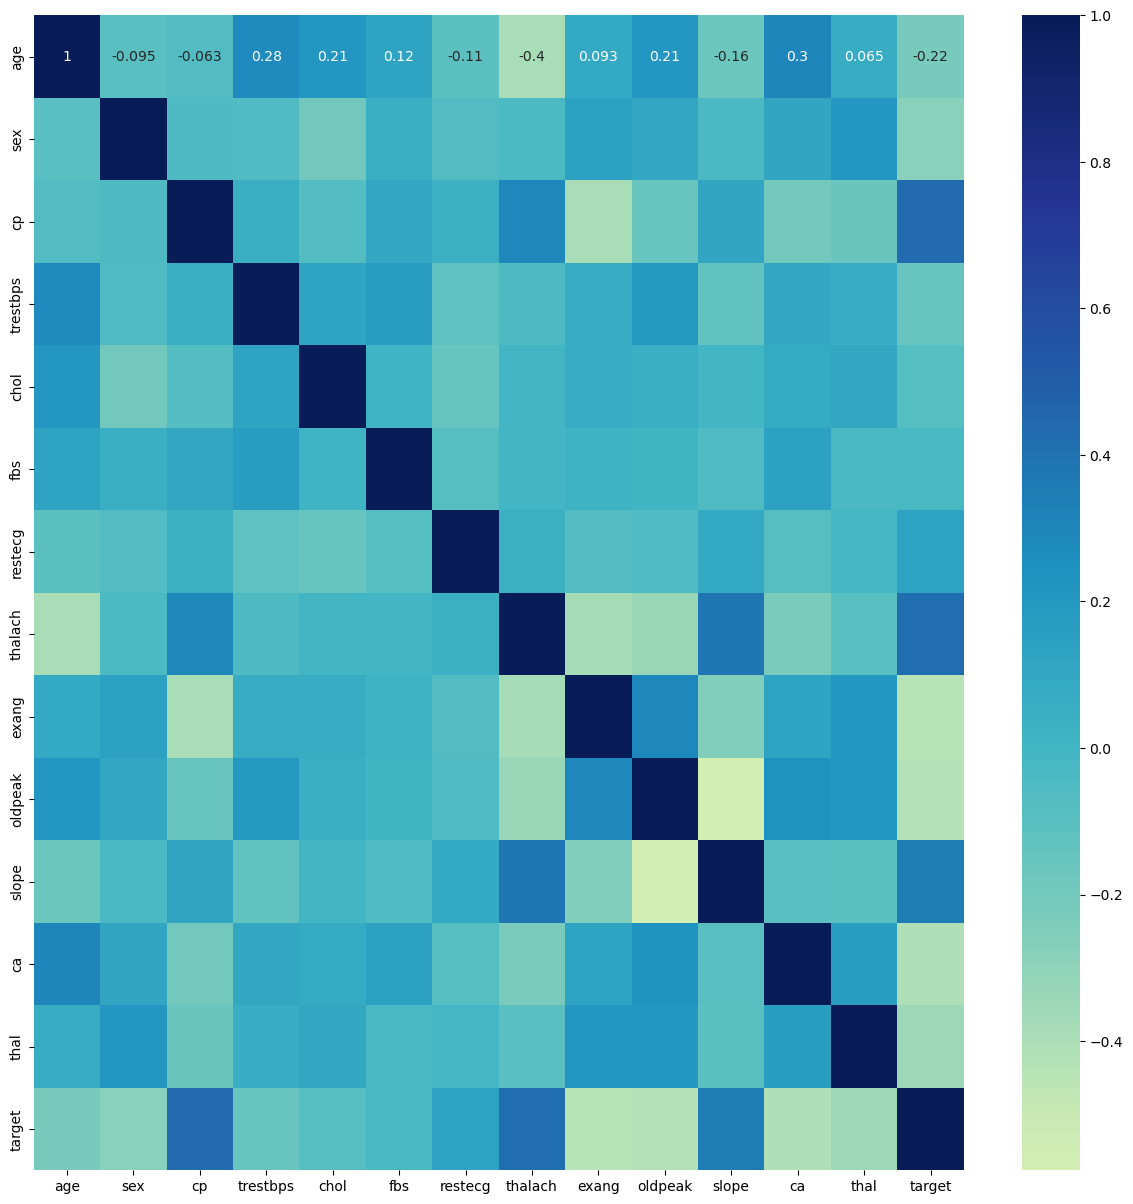

In [14]:
plt.figure(figsize=(15,15))
p=sns.heatmap(df.corr(), annot=True,cmap='YlGnBu',center=0) 

In [15]:
X = df.drop('target', axis=1)  # Features
y = df['target']  # Target (whether an individual defaults)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train.shape, X_test.shape

((241, 13), (61, 13))

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [19]:
y_pred_log = log_reg.predict(X_test)

accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

print("Logistic Regression Performance:")
print("Accuracy:", accuracy_log)
print("Precision:", precision_log)
print("Recall:", recall_log)
print("F1 Score:", f1_log)

Logistic Regression Performance:
Accuracy: 0.8688524590163934
Precision: 0.8529411764705882
Recall: 0.90625
F1 Score: 0.8787878787878788


In [20]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_log)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[24  5]
 [ 3 29]]


Text(0.5, 23.52222222222222, 'Predicted label')

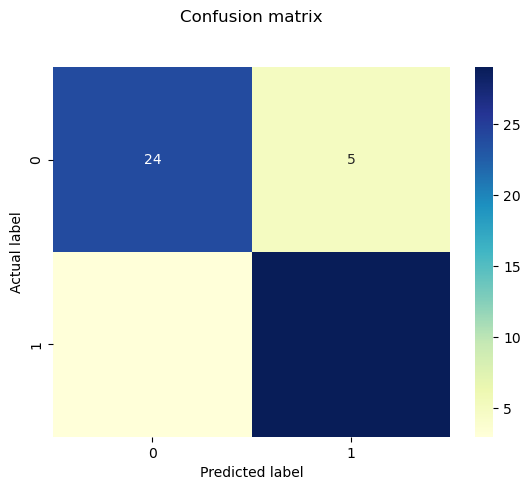

In [22]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Naive Bayes Classifier

In [23]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [24]:
y_pred_nb = gnb.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

print("Accuracy: ",accuracy_nb)
print("Precision: ",precision_nb)
print("Recall: ",recall_nb)
print("F1 Score: ",f1_nb)

Accuracy:  0.8852459016393442
Precision:  0.9032258064516129
Recall:  0.875
F1 Score:  0.8888888888888888


In [25]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_nb)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[26  3]
 [ 4 28]]


Text(0.5, 23.52222222222222, 'Predicted label')

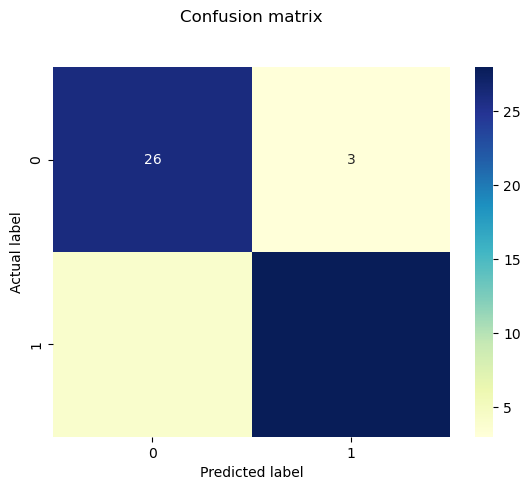

In [27]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## KNN Classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [29]:
y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print("KNN Performance:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)

KNN Performance:
Accuracy: 0.8524590163934426
Precision: 0.8285714285714286
Recall: 0.90625
F1 Score: 0.8656716417910447


In [30]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.79      0.84        29
           1       0.83      0.91      0.87        32

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_knn)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[23  6]
 [ 3 29]]


Text(0.5, 23.52222222222222, 'Predicted label')

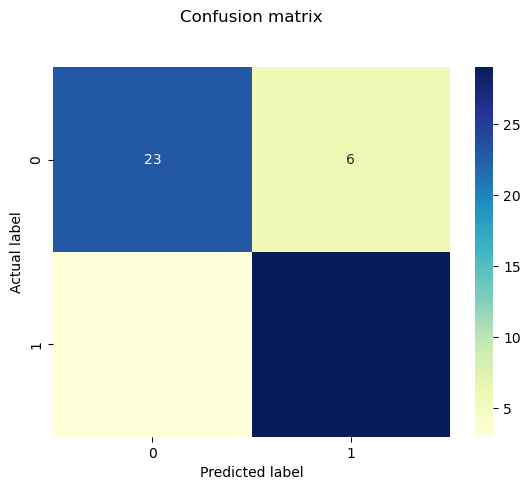

In [32]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
y_pred_dt = dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("Decision Tree Performance:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)

Decision Tree Performance:
Accuracy: 0.7868852459016393
Precision: 0.8518518518518519
Recall: 0.71875
F1 Score: 0.7796610169491526


In [35]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.79      0.84        29
           1       0.83      0.91      0.87        32

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_dt)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[25  4]
 [ 9 23]]


Text(0.5, 23.52222222222222, 'Predicted label')

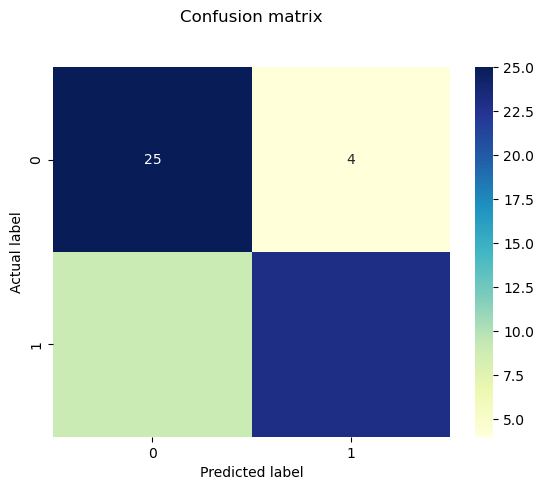

In [37]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Accuracy: ",accuracy_rf)
print("Precision: ",precision_rf)
print("Recall: ",recall_rf)
print("F1 Score: ",f1_rf)

Accuracy:  0.8688524590163934
Precision:  0.9
Recall:  0.84375
F1 Score:  0.8709677419354839


In [40]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[26  3]
 [ 5 27]]


Text(0.5, 23.52222222222222, 'Predicted label')

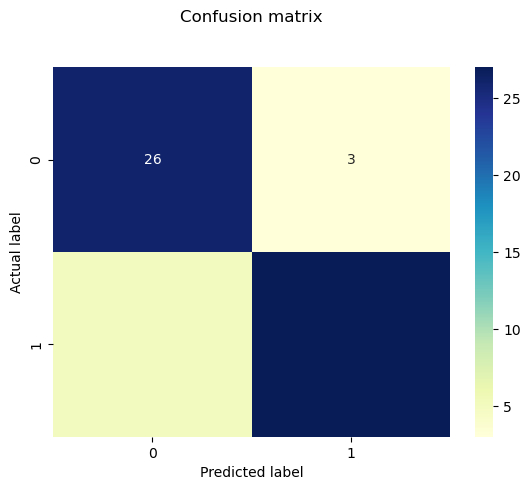

In [42]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Kmeans Clustering

In [43]:
XY = df[['trestbps', 'thalach']]
XY

,trestbps,thalach
0,145,150
1,130,187
2,130,172
3,120,178
4,120,163
...,...,...
298,140,123
299,110,132
300,144,141
301,130,115


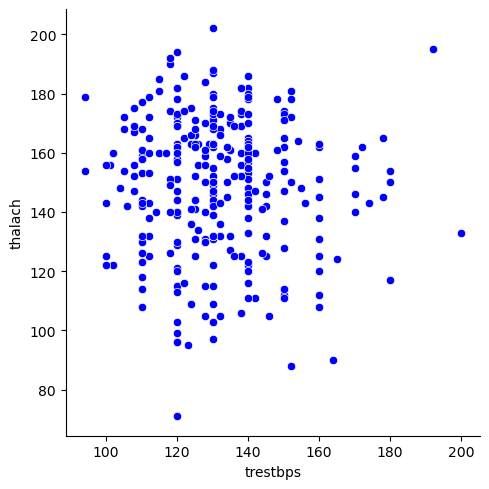

In [44]:
sns.relplot( x="trestbps", y="thalach", data=df, color="blue")

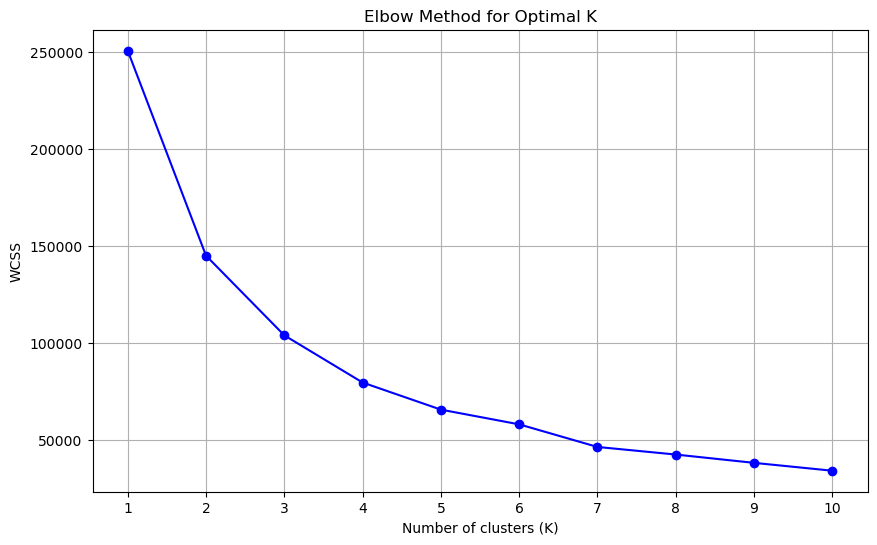

In [45]:
from sklearn.cluster import KMeans
# Generate the elbow curve
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(XY)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', color='blue')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid()
plt.show()


In [46]:
kmeans = KMeans(n_clusters=3, random_state=0)
label = kmeans.fit_predict(XY)
print(label)

[2 1 1 1 1 2 1 1 2 1 1 0 1 0 2 1 1 0 1 2 1 1 1 2 1 2 2 0 1 1 1 0 1 1 0 1 1
 2 2 2 2 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 2 1 1 1 0 2 1 1 1 2
 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 2 1 0 2 1 1 1 1 1 0 0 0 0 1 1 1 0 0 2 1 1
 1 1 2 0 2 2 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 2 1
 0 0 1 1 0 0 0 2 1 2 2 1 0 1 1 0 0 2 2 1 0 2 0 1 1 0 0 2 0 0 0 0 0 1 2 0 1
 2 0 0 0 0 2 0 1 2 2 0 0 1 1 1 1 1 2 2 0 0 0 1 1 2 2 2 0 0 0 0 2 2 0 0 2 1
 2 1 0 1 0 0 2 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 2 0 0 2 0 2 2 0 2 0
 0 0 0 2 0 1]


In [47]:
print(kmeans.cluster_centers_)

[[126.36734694 124.45918367]
 [126.27922078 166.13636364]
 [158.26       147.76      ]]


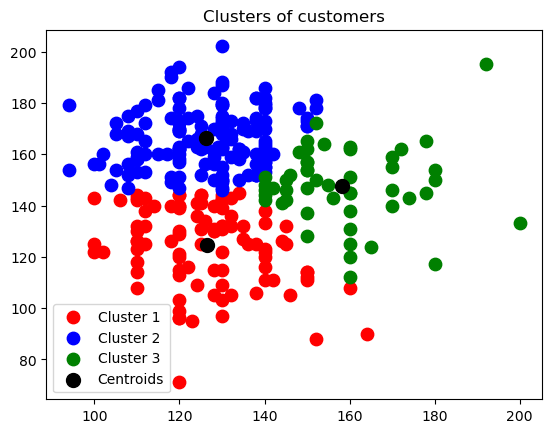

In [48]:
import matplotlib.pyplot as plt

plt.scatter(XY.loc[label == 0, 'trestbps'], XY.loc[label == 0,
                   'thalach'],
            s=80, c='red', label='Cluster 1')

plt.scatter(XY.loc[label == 1, 'trestbps'], XY.loc[label == 1, 'thalach'], s=80, c='blue', label='Cluster 2')
plt.scatter(XY.loc[label == 2, 'trestbps'], XY.loc[label == 2, 'thalach'], s=80, c='green', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100,
            c='black', label='Centroids')

plt.title('Clusters of customers')
plt.legend()
plt.show()

In [49]:
true_labels = df['target']

accuracy_kmeans = accuracy_score(true_labels, label)
precision_kmeans = precision_score(true_labels, label, average='weighted')
recall_kmeans = recall_score(true_labels, label, average='weighted')
f1_kmeans = f1_score(true_labels, label, average='weighted')
print("Accuracy: ",accuracy_kmeans)
print("Precision: ",precision_kmeans)
print("Recall: ",recall_kmeans)
print("F1 Score: ",f1_kmeans)

Accuracy:  0.6059602649006622
Precision:  0.7237280222143042
Recall:  0.6059602649006622
F1 Score:  0.6565556983927636


In [50]:
report = classification_report(true_labels, label)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.50      0.58       138
           1       0.74      0.70      0.72       164
           2       0.00      0.00      0.00         0

    accuracy                           0.61       302
   macro avg       0.48      0.40      0.43       302
weighted avg       0.72      0.61      0.66       302



In [51]:
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(true_labels, label)
print('Confusion Matrix:\n', confusion_mat)

Confusion Matrix:
 [[ 69  40  29]
 [ 29 114  21]
 [  0   0   0]]


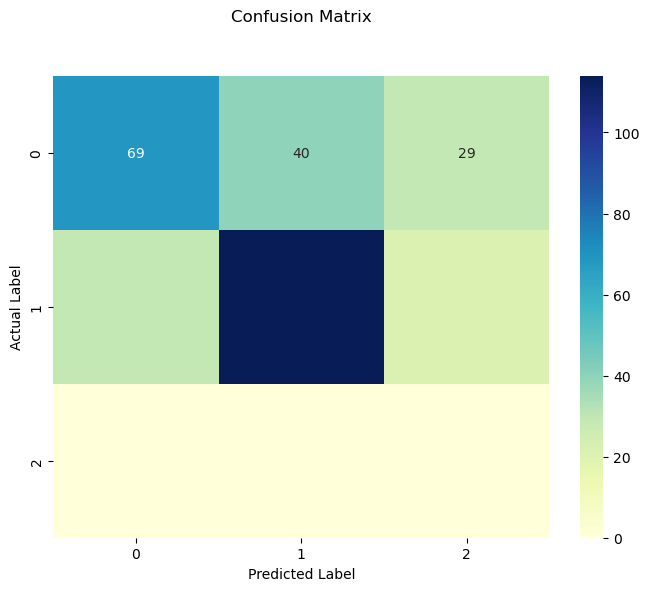

In [52]:
confusion_mat = confusion_matrix(true_labels, label)
plt.figure(figsize=(8, 6))
p = sns.heatmap(pd.DataFrame(confusion_mat), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

### Comparision Between Models

In [53]:
# Compare performance across models
models = ['Logistic Regression', 'Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree (DT)', 'Random Forest', 'Kmeans']
accuracies = [accuracy_log, accuracy_nb, accuracy_knn, accuracy_dt, accuracy_rf, accuracy_kmeans]
precisions = [precision_log, precision_nb, precision_knn, precision_dt, precision_rf, precision_kmeans]
recalls = [recall_log, recall_nb, recall_knn, recall_dt, recall_rf, recall_kmeans]
f1_scores = [f1_log, f1_nb, f1_knn, f1_dt, f1_rf, f1_kmeans]

performance_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

print(performance_df)

                 Model  Accuracy  Precision   Recall  F1 Score
0  Logistic Regression  0.868852   0.852941  0.90625  0.878788
1          Naive Bayes  0.885246   0.903226  0.87500  0.888889
2  K-Nearest Neighbors  0.852459   0.828571  0.90625  0.865672
3   Decision Tree (DT)  0.786885   0.851852  0.71875  0.779661
4        Random Forest  0.868852   0.900000  0.84375  0.870968
5               Kmeans  0.605960   0.723728  0.60596  0.656556
